<a href="https://colab.research.google.com/github/Basavaraj2003671/stock-prediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.3148
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0388
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0088
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0179
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0064
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0086
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0052
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0063
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0054
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0052
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


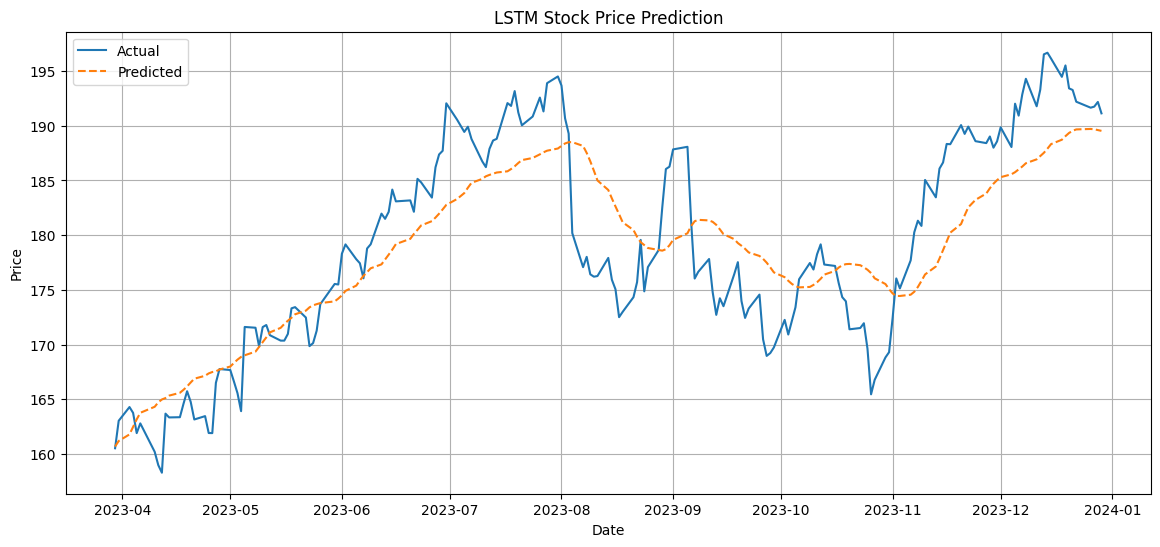

In [ ]:
# Install dependencies
!pip install yfinance keras

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import yfinance as yf

# Download real AAPL data
df = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
df = df.reset_index()[['Date', 'Close']]
df.to_csv('stock_data.csv', index=False)

# Load and preprocess
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Close']])

X, y = [], []
window = 60
for i in range(window, len(scaled)):
    X.append(scaled[i-window:i])
    y.append(scaled[i])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict
pred = model.predict(X)
pred = scaler.inverse_transform(pred)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index[window:], df['Close'][window:], label='Actual')
plt.plot(df.index[window:], pred, label='Predicted', linestyle='--')
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()